In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tools.clusterfit as cf
plt.style.use('nice.mplstyle')

In [3]:
data = pd.read_csv('../data/fits/physical-properties-corr-LX-T-60deg.csv')
data

,logA,B,scat,T,LX,YSZ,Mgas,Lcore/Ltot,Flux,ObservedRedshift
0,0.199204,2.5108,0.113,4.151764,2.937168e+44,66.619896,4.654528e+13,0.331071,4.921727e-11,0.096326
1,0.206775,2.7052,0.141,3.633357,2.197928e+44,45.696640,3.650551e+13,0.364537,1.457303e-11,0.078609
2,0.195419,2.5540,0.120,4.089679,2.905355e+44,66.867098,4.607393e+13,0.346290,3.097788e-11,0.097616
3,0.211822,2.4460,0.120,4.062781,2.738792e+44,60.222682,4.444746e+13,0.352942,1.181807e-11,0.097686
4,0.191633,2.6188,0.113,3.811994,2.511199e+44,56.365428,4.016653e+13,0.357384,3.021897e-11,0.090038
...,...,...,...,...,...,...,...,...,...,...
9995,0.206775,2.4784,0.134,4.349552,3.446964e+44,78.498183,5.133840e+13,0.348683,6.983643e-11,0.094621
9996,0.221916,2.5324,0.134,3.686827,2.158655e+44,45.889651,3.674603e+13,0.337019,1.139503e-11,0.088681
9997,0.226964,2.6836,0.106,3.481980,1.823575e+44,37.979464,3.270397e+13,0.328640,1.140123e-11,0.081830
9998,0.209298,2.5540,0.113,3.872342,2.374180e+44,48.976006,4.013383e+13,0.332678,1.275364e-11,0.090878


In [2]:
def sample_key_name(key):
    if key == 'LX':
        return cf.COLUMNS['LX']
    elif key == 'T':
        return cf.COLUMNS['T']
    elif key == 'Mgas':
        return cf.COLUMNS['M']
    elif key == 'YSZ':
        return cf.COLUMNS['YSZ']
    else:
        return key

# T relations for A

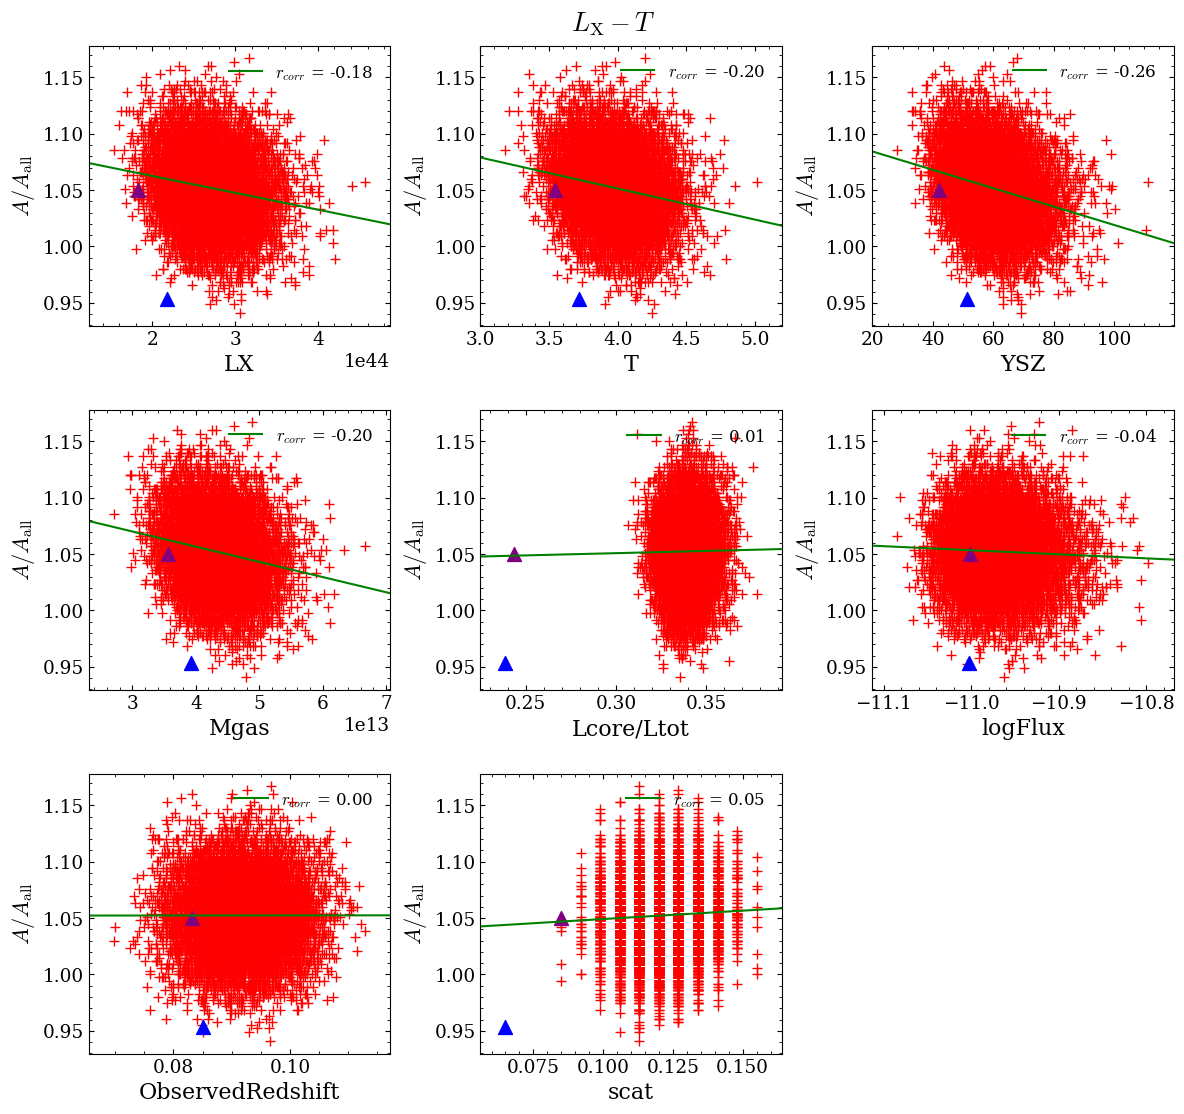

In [20]:
data = pd.read_csv('../data/fits/physical-properties-corr-LX-T-60deg.csv')

# Plot the dipole
samples = pd.read_csv('../data/samples-lightcone0-clean.csv')
dtheta = cf.angular_separation(samples['phi_on_lc'], samples['theta_on_lc'], -64, 32)
p_dipoles = samples[:313][dtheta[:313] < 75]
n_dipoles = samples[:313][dtheta[:313] > 105]

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('$L_\\mathrm{{X}}-T$', )
fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)

idx = 0
keys = ['LX', 'T', 'YSZ', 'Mgas', 'Lcore/Ltot', 'logFlux', 'ObservedRedshift', 'scat']
for row in ax:
    for subax in row:
        if idx >= len(keys):
            fig.delaxes(subax)
        else:
            # Plot the whole sky
            Y = 10**data['logA']/1.514
            X = data[keys[idx]]
            subax.scatter(X, Y, marker='+', color='r', s=50, linewidths=1)

            # The dipole
            py = 1.590/1.514
            ny = 1.444/1.514
            sample_key = sample_key_name(keys[idx])
            if keys[idx] == 'scat':
                px = 0.085
                nx = 0.065
            elif keys[idx] == 'logFlux':
                px = np.mean(np.log10(p_dipoles['Flux']))
                nx = np.mean(np.log10(n_dipoles['Flux']))
            else:
                px = np.mean(p_dipoles[sample_key])
                nx = np.mean(n_dipoles[sample_key])
            subax.scatter(px, py, marker='^', color='purple', s=100)
            subax.scatter(nx, ny, marker='^', color='blue', s=100)

            xmin = np.min(np.append(X, [px, nx]))
            xmax = np.max(np.append(X, [px, nx]))
            xlen = xmax - xmin
            # fit a line
            m, b = np.polyfit(X, Y, 1)
            x = np.linspace(xmin - 0.1*xlen, xmax + 0.1*xlen, 100)
            subax.plot(x, m*x + b, color='g', label='$r_{{corr}}$ = {:.2f}'.format(np.corrcoef(X, Y)[0,1]))
            subax.set_xlim(xmin - 0.1*xlen, xmax + 0.1*xlen)

            subax.legend(loc='upper right')
            subax.set_xlabel(keys[idx])
            subax.set_ylabel('$A/A_\\mathrm{all}$')

        idx += 1

plt.show()

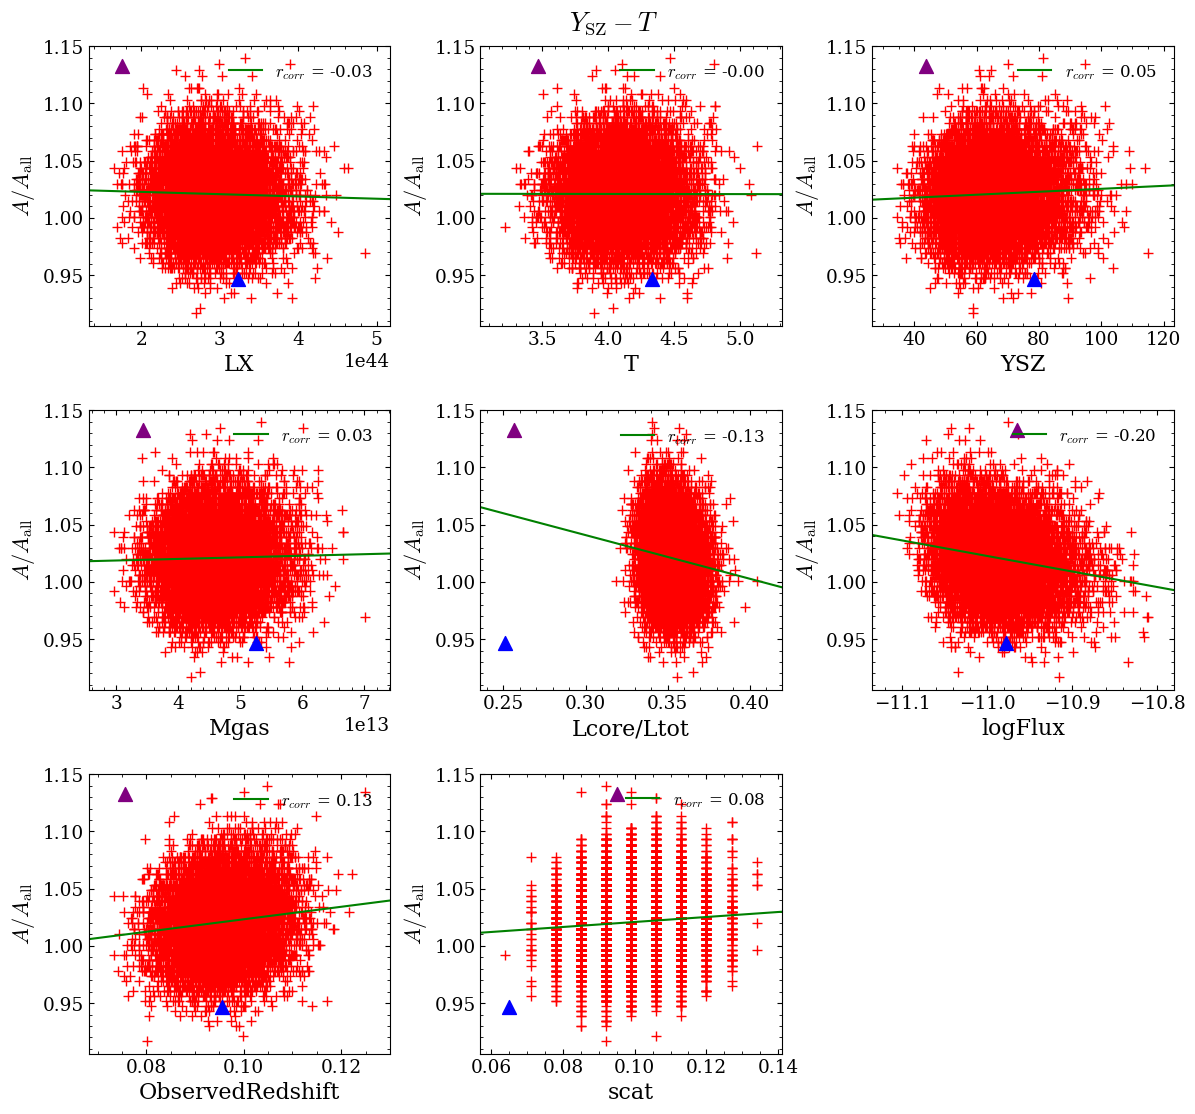

In [23]:
data = pd.read_csv('../data/fits/physical-properties-corr-YSZ-T-60deg.csv')

# Plot the dipole
samples = pd.read_csv('../data/samples-lightcone0-clean.csv')
dtheta = cf.angular_separation(samples['phi_on_lc'], samples['theta_on_lc'], -64, 22)
p_dipoles = samples[:260][dtheta[:260] < 60]
n_dipoles = samples[:260][dtheta[:260] > 120]

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('$Y_\\mathrm{{SZ}}-T$', )
fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)

idx = 0
keys = ['LX', 'T', 'YSZ', 'Mgas', 'Lcore/Ltot', 'logFlux', 'ObservedRedshift', 'scat']
for row in ax:
    for subax in row:
        if idx >= len(keys):
            fig.delaxes(subax)
        else:
            # Plot the whole sky
            Y = 10**data['logA']/1.079
            X = data[keys[idx]]
            subax.scatter(X, Y, marker='+', color='r', s=50, linewidths=1)

            # The dipole
            py = 1.222/1.079
            ny = 1.021/1.079
            sample_key = sample_key_name(keys[idx])
            if keys[idx] == 'scat':
                px = 0.095
                nx = 0.065
            elif keys[idx] == 'logFlux':
                px = np.mean(np.log10(p_dipoles['Flux']))
                nx = np.mean(np.log10(n_dipoles['Flux']))
            else:
                px = np.mean(p_dipoles[sample_key])
                nx = np.mean(n_dipoles[sample_key])
            subax.scatter(px, py, marker='^', color='purple', s=100)
            subax.scatter(nx, ny, marker='^', color='blue', s=100)

            xmin = np.min(np.append(X, [px, nx]))
            xmax = np.max(np.append(X, [px, nx]))
            xlen = xmax - xmin
            # fit a line
            m, b = np.polyfit(X, Y, 1)
            x = np.linspace(xmin - 0.1*xlen, xmax + 0.1*xlen, 100)
            subax.plot(x, m*x + b, color='g', label='$r_{{corr}}$ = {:.2f}'.format(np.corrcoef(X, Y)[0,1]))
            subax.set_xlim(xmin - 0.1*xlen, xmax + 0.1*xlen)

            subax.legend(loc='upper right')
            subax.set_xlabel(keys[idx])
            subax.set_ylabel('$A/A_\\mathrm{all}$')

        idx += 1

plt.show()

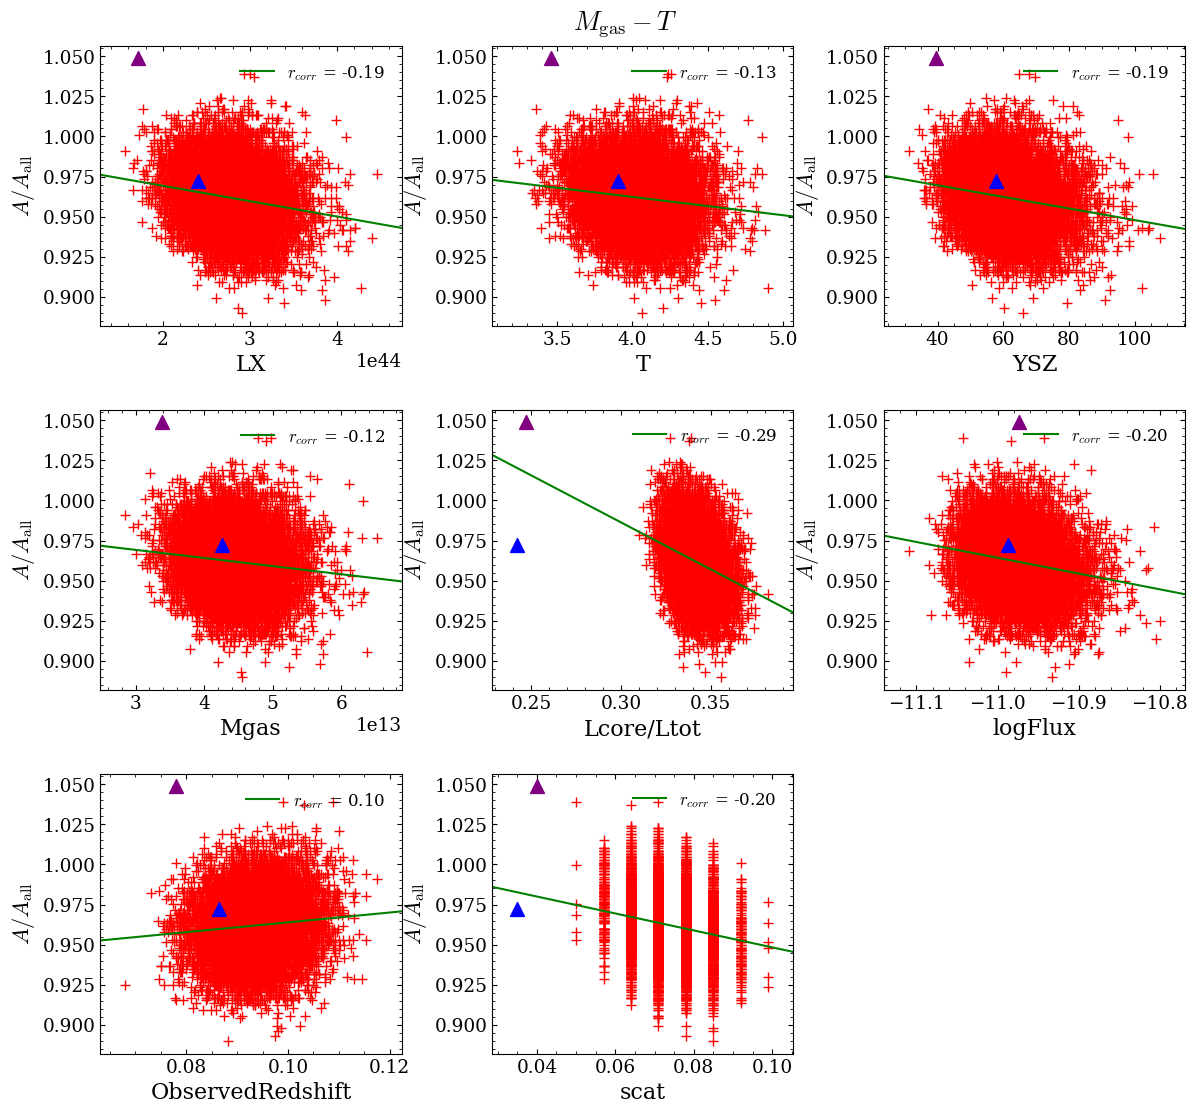

In [22]:
data = pd.read_csv('../data/fits/physical-properties-corr-M-T-60deg.csv')

# Plot the dipole
samples = pd.read_csv('../data/samples-lightcone0-clean.csv')
dtheta = cf.angular_separation(samples['phi_on_lc'], samples['theta_on_lc'], -92, 14)
p_dipoles = samples[:300][dtheta[:300] < 75]
n_dipoles = samples[:300][dtheta[:300] > 105]

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('$M_\\mathrm{{gas}}-T$', )
fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)

idx = 0
keys = ['LX', 'T', 'YSZ', 'Mgas', 'Lcore/Ltot', 'logFlux', 'ObservedRedshift', 'scat']
for row in ax:
    for subax in row:
        if idx >= len(keys):
            fig.delaxes(subax)
        else:
            # Plot the whole sky
            Y = 10**data['logA']/1.069
            X = data[keys[idx]]
            subax.scatter(X, Y, marker='+', color='r', s=50, linewidths=1)

            # The dipole
            py = 1.121/1.069
            ny = 1.039/1.069
            sample_key = sample_key_name(keys[idx])
            if keys[idx] == 'scat':
                px = 0.040
                nx = 0.035
            elif keys[idx] == 'logFlux':
                px = np.mean(np.log10(p_dipoles['Flux']))
                nx = np.mean(np.log10(n_dipoles['Flux']))
            else:
                px = np.mean(p_dipoles[sample_key])
                nx = np.mean(n_dipoles[sample_key])
            subax.scatter(px, py, marker='^', color='purple', s=100)
            subax.scatter(nx, ny, marker='^', color='blue', s=100)

            xmin = np.min(np.append(X, [px, nx]))
            xmax = np.max(np.append(X, [px, nx]))
            xlen = xmax - xmin
            # fit a line
            m, b = np.polyfit(X, Y, 1)
            x = np.linspace(xmin - 0.1*xlen, xmax + 0.1*xlen, 100)
            subax.plot(x, m*x + b, color='g', label='$r_{{corr}}$ = {:.2f}'.format(np.corrcoef(X, Y)[0,1]))
            subax.set_xlim(xmin - 0.1*xlen, xmax + 0.1*xlen)

            subax.legend(loc='upper right')
            subax.set_xlabel(keys[idx])
            subax.set_ylabel('$A/A_\\mathrm{all}$')

        idx += 1

plt.show()

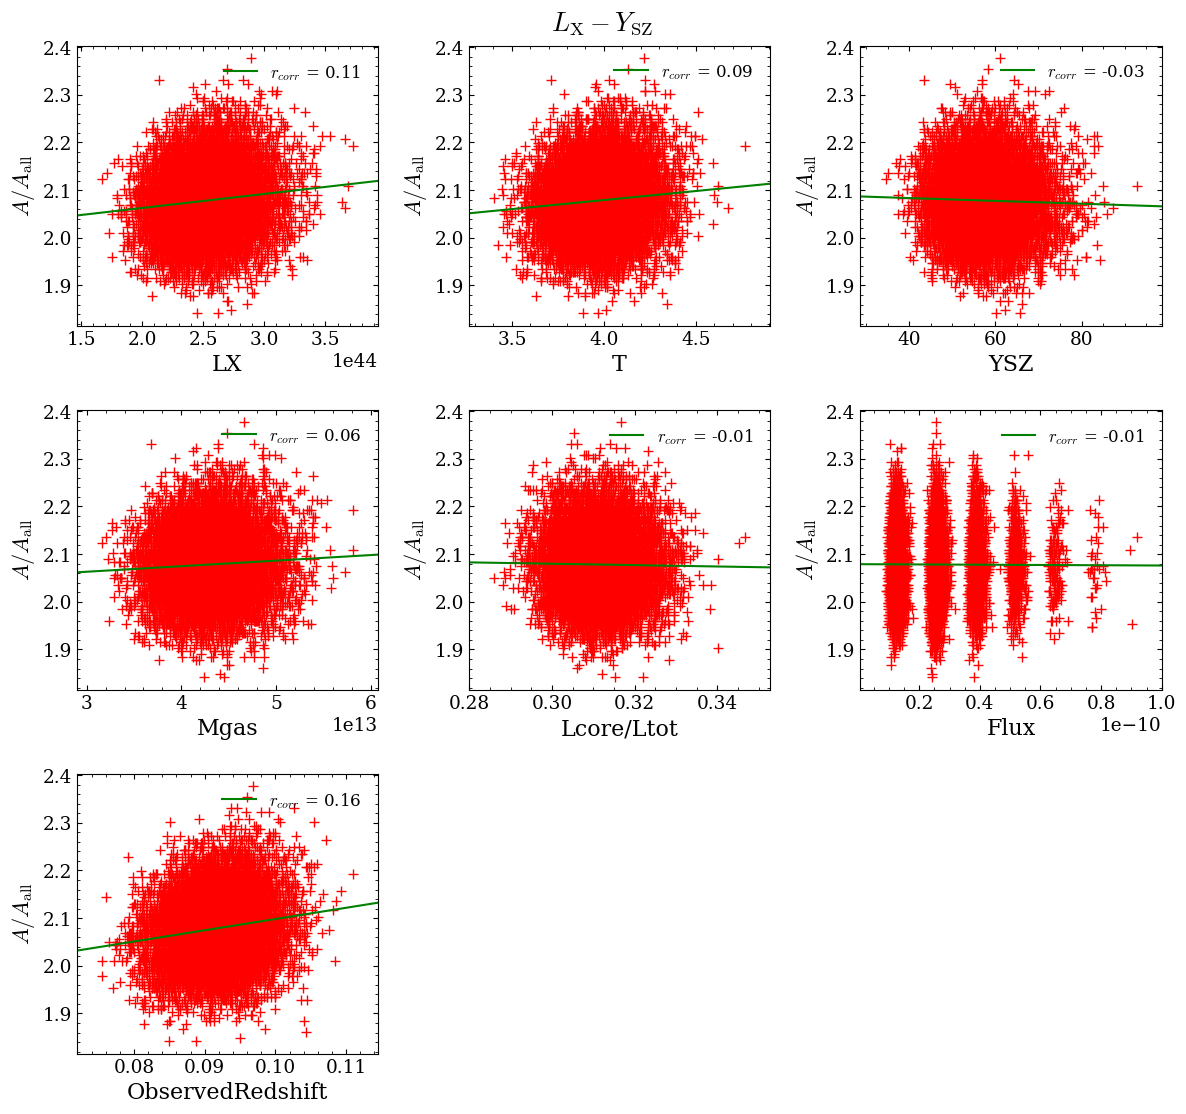

In [11]:
data = pd.read_csv('../data/fits/physical-properties-corr-LX-YSZ-60deg.csv')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('$L_\\mathrm{{X}}-Y_\\mathrm{{SZ}}$', )
fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)

idx = 0
keys = ['LX', 'T', 'YSZ', 'Mgas', 'Lcore/Ltot', 'Flux', 'ObservedRedshift']
for row in ax:
    for subax in row:
        if idx >= len(keys):
            fig.delaxes(subax)
        else:
            Y = 10**data['logA']/2.972
            X = data[keys[idx]]

            subax.scatter(X, Y, marker='+', color='r', s=50, linewidths=1)

            xmin = np.min(X)
            xmax = np.max(X)
            xlen = xmax - xmin
            # fit a line
            m, b = np.polyfit(X, Y, 1)
            x = np.linspace(xmin - 0.1*xlen, xmax + 0.1*xlen, 100)
            subax.plot(x, m*x + b, color='g', label='$r_{{corr}}$ = {:.2f}'.format(np.corrcoef(X, Y)[0,1]))
            subax.set_xlim(xmin - 0.1*xlen, xmax + 0.1*xlen)

            subax.legend(loc='upper right')
            subax.set_xlabel(keys[idx])
            subax.set_ylabel('$A/A_\\mathrm{all}$')

        idx += 1

plt.show()

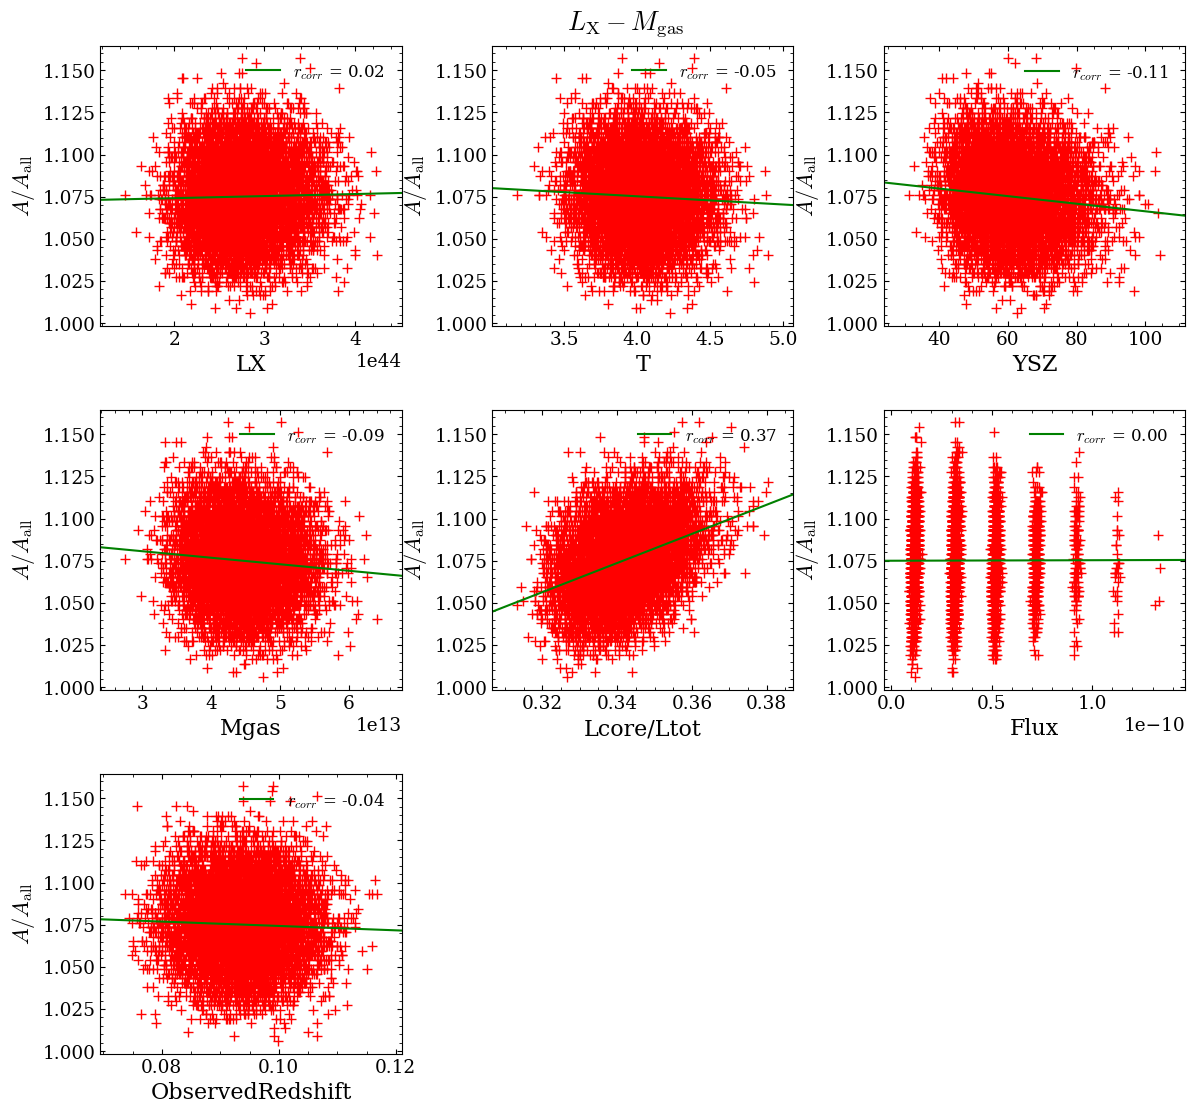

In [16]:
data = pd.read_csv('../data/fits/physical-properties-corr-LX-M-60deg.csv')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('$L_\\mathrm{{X}}-M_\\mathrm{{gas}}$', )
fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)

idx = 0
keys = ['LX', 'T', 'YSZ', 'Mgas', 'Lcore/Ltot', 'Flux', 'ObservedRedshift']
for row in ax:
    for subax in row:
        if idx >= len(keys):
            fig.delaxes(subax)
        else:
            Y = 10**data['logA']/1.252
            X = data[keys[idx]]

            subax.scatter(X, Y, marker='+', color='r', s=50, linewidths=1)

            xmin = np.min(X)
            xmax = np.max(X)
            xlen = xmax - xmin
            # fit a line
            m, b = np.polyfit(X, Y, 1)
            x = np.linspace(xmin - 0.1*xlen, xmax + 0.1*xlen, 100)
            subax.plot(x, m*x + b, color='g', label='$r_{{corr}}$ = {:.2f}'.format(np.corrcoef(X, Y)[0,1]))
            subax.set_xlim(xmin - 0.1*xlen, xmax + 0.1*xlen)

            subax.legend(loc='upper right')
            subax.set_xlabel(keys[idx])
            subax.set_ylabel('$A/A_\\mathrm{all}$')

        idx += 1

plt.show()

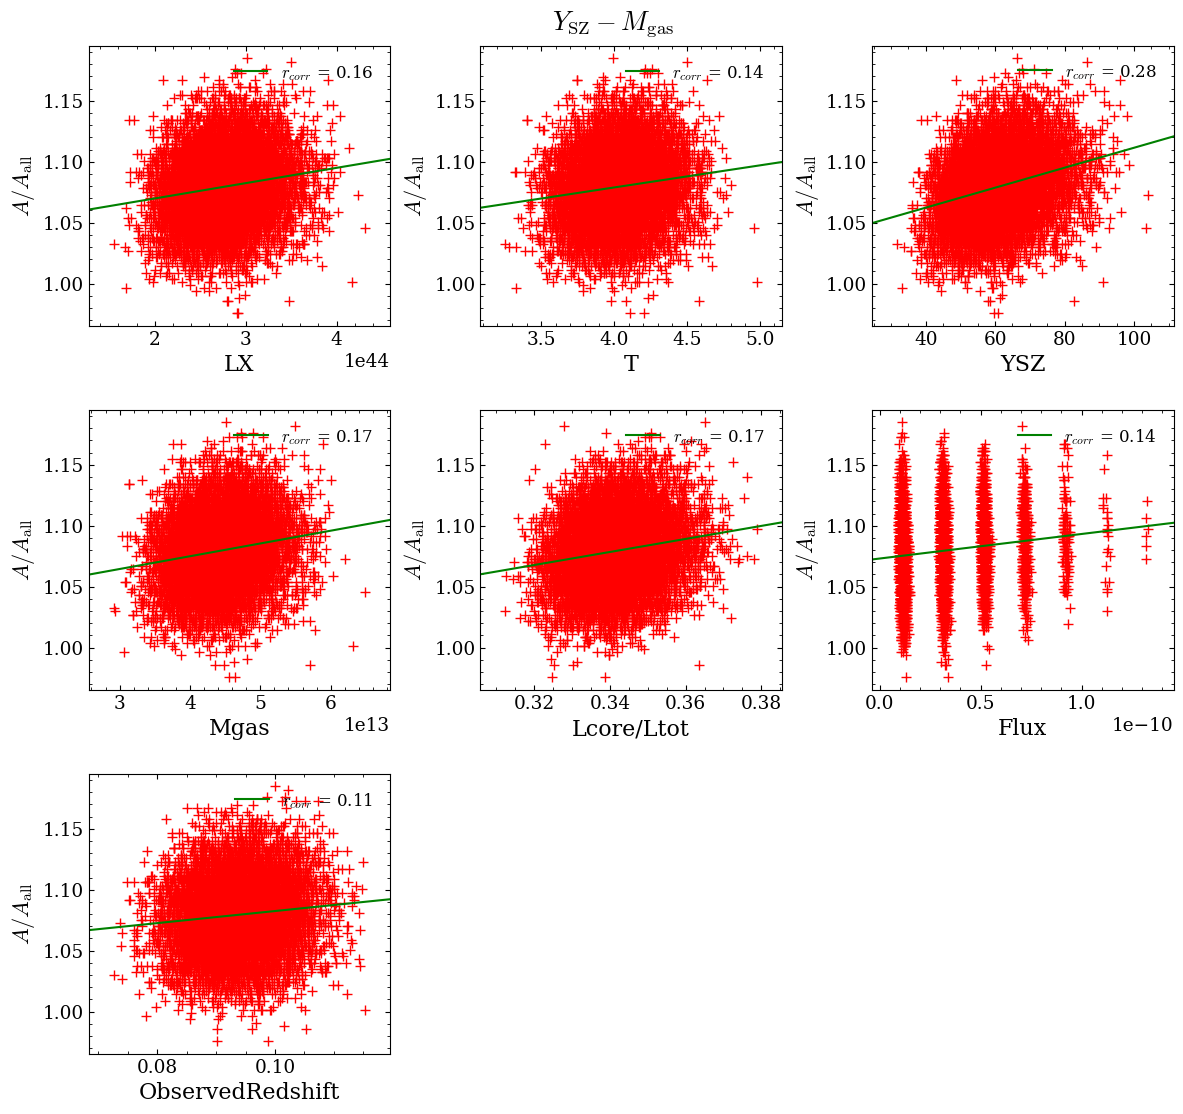

In [17]:
data = pd.read_csv('../data/fits/physical-properties-corr-YSZ-M-60deg.csv')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('$Y_\\mathrm{{SZ}}-M_\\mathrm{{gas}}$', )
fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)

idx = 0
keys = ['LX', 'T', 'YSZ', 'Mgas', 'Lcore/Ltot', 'Flux', 'ObservedRedshift']
for row in ax:
    for subax in row:
        if idx >= len(keys):
            fig.delaxes(subax)
        else:
            Y = 10**data['logA']/3.829
            X = data[keys[idx]]

            subax.scatter(X, Y, marker='+', color='r', s=50, linewidths=1)

            xmin = np.min(X)
            xmax = np.max(X)
            xlen = xmax - xmin
            # fit a line
            m, b = np.polyfit(X, Y, 1)
            x = np.linspace(xmin - 0.1*xlen, xmax + 0.1*xlen, 100)
            subax.plot(x, m*x + b, color='g', label='$r_{{corr}}$ = {:.2f}'.format(np.corrcoef(X, Y)[0,1]))
            subax.set_xlim(xmin - 0.1*xlen, xmax + 0.1*xlen)

            subax.legend(loc='upper right')
            subax.set_xlabel(keys[idx])
            subax.set_ylabel('$A/A_\\mathrm{all}$')

        idx += 1

plt.show()

# T relations for B

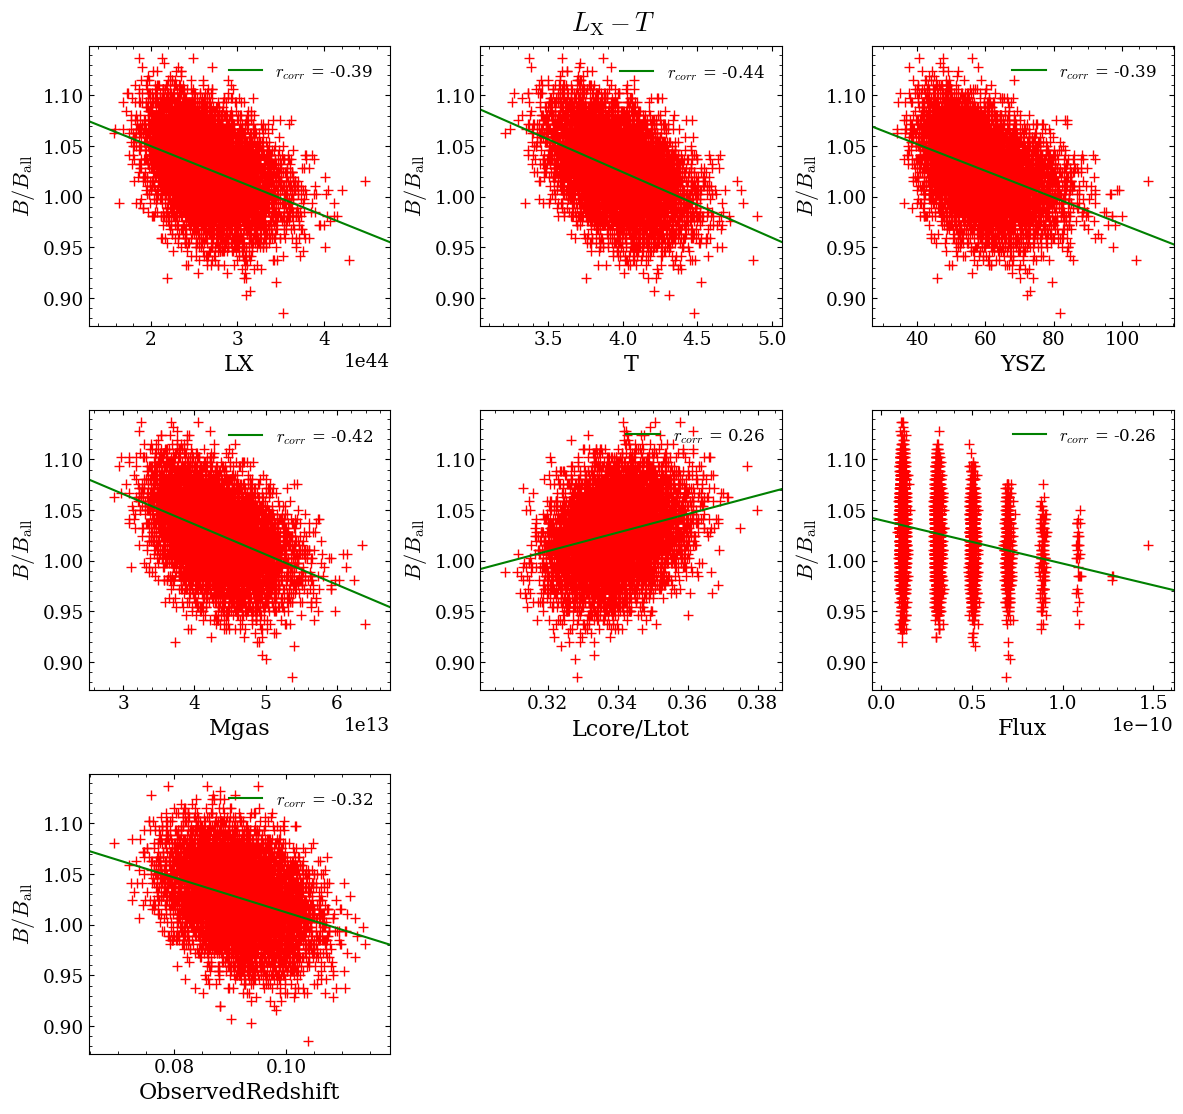

In [14]:
data = pd.read_csv('../data/fits/physical-properties-corr-LX-T-60deg.csv')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('$L_\\mathrm{{X}}-T$', )
fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)

idx = 0
keys = ['LX', 'T', 'YSZ', 'Mgas', 'Lcore/Ltot', 'Flux', 'ObservedRedshift']
for row in ax:
    for subax in row:
        if idx >= len(keys):
            fig.delaxes(subax)
        else:
            Y = data['B']/2.494
            X = data[keys[idx]]

            subax.scatter(X, Y, marker='+', color='r', s=50, linewidths=1)

            xmin = np.min(X)
            xmax = np.max(X)
            xlen = xmax - xmin
            # fit a line
            m, b = np.polyfit(X, Y, 1)
            x = np.linspace(xmin - 0.1*xlen, xmax + 0.1*xlen, 100)
            subax.plot(x, m*x + b, color='g', label='$r_{{corr}}$ = {:.2f}'.format(np.corrcoef(X, Y)[0,1]))
            subax.set_xlim(xmin - 0.1*xlen, xmax + 0.1*xlen)

            subax.legend(loc='upper right')
            subax.set_xlabel(keys[idx])
            subax.set_ylabel('$B/B_\\mathrm{all}$')

        idx += 1

plt.show()

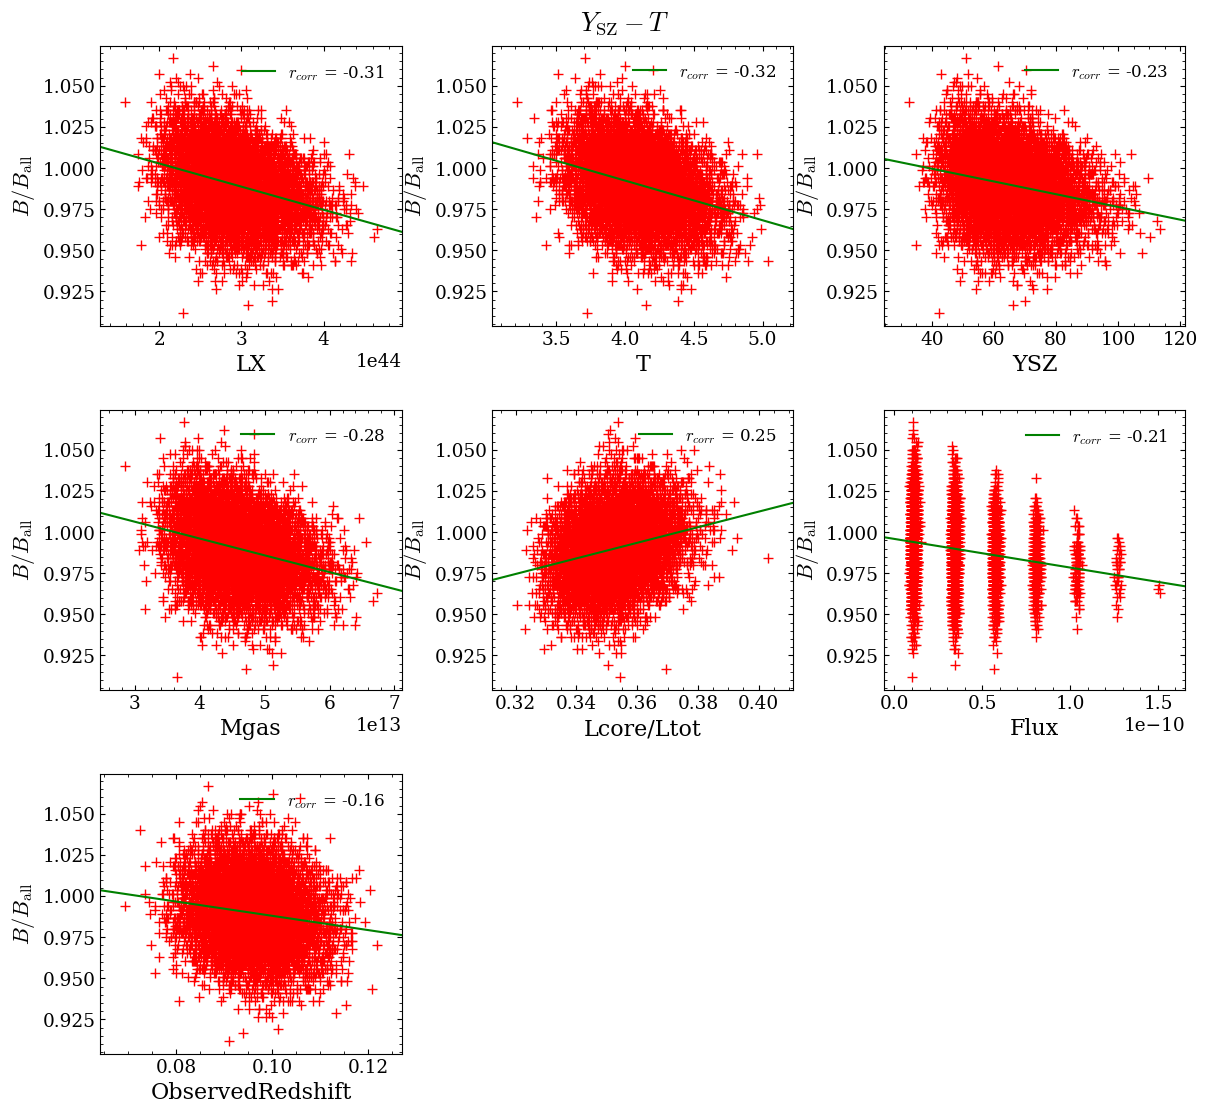

In [14]:
data = pd.read_csv('../data/fits/physical-properties-corr-YSZ-T-60deg.csv')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('$Y_\\mathrm{{SZ}}-T$', )
fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)

idx = 0
keys = ['LX', 'T', 'YSZ', 'Mgas', 'Lcore/Ltot', 'Flux', 'ObservedRedshift']
for row in ax:
    for subax in row:
        if idx >= len(keys):
            fig.delaxes(subax)
        else:
            Y = data['B']/2.756
            X = data[keys[idx]]

            subax.scatter(X, Y, marker='+', color='r', s=50, linewidths=1)

            xmin = np.min(X)
            xmax = np.max(X)
            xlen = xmax - xmin
            # fit a line
            m, b = np.polyfit(X, Y, 1)
            x = np.linspace(xmin - 0.1*xlen, xmax + 0.1*xlen, 100)
            subax.plot(x, m*x + b, color='g', label='$r_{{corr}}$ = {:.2f}'.format(np.corrcoef(X, Y)[0,1]))
            subax.set_xlim(xmin - 0.1*xlen, xmax + 0.1*xlen)

            subax.legend(loc='upper right')
            subax.set_xlabel(keys[idx])
            subax.set_ylabel('$B/B_\\mathrm{all}$')

        idx += 1

plt.show()

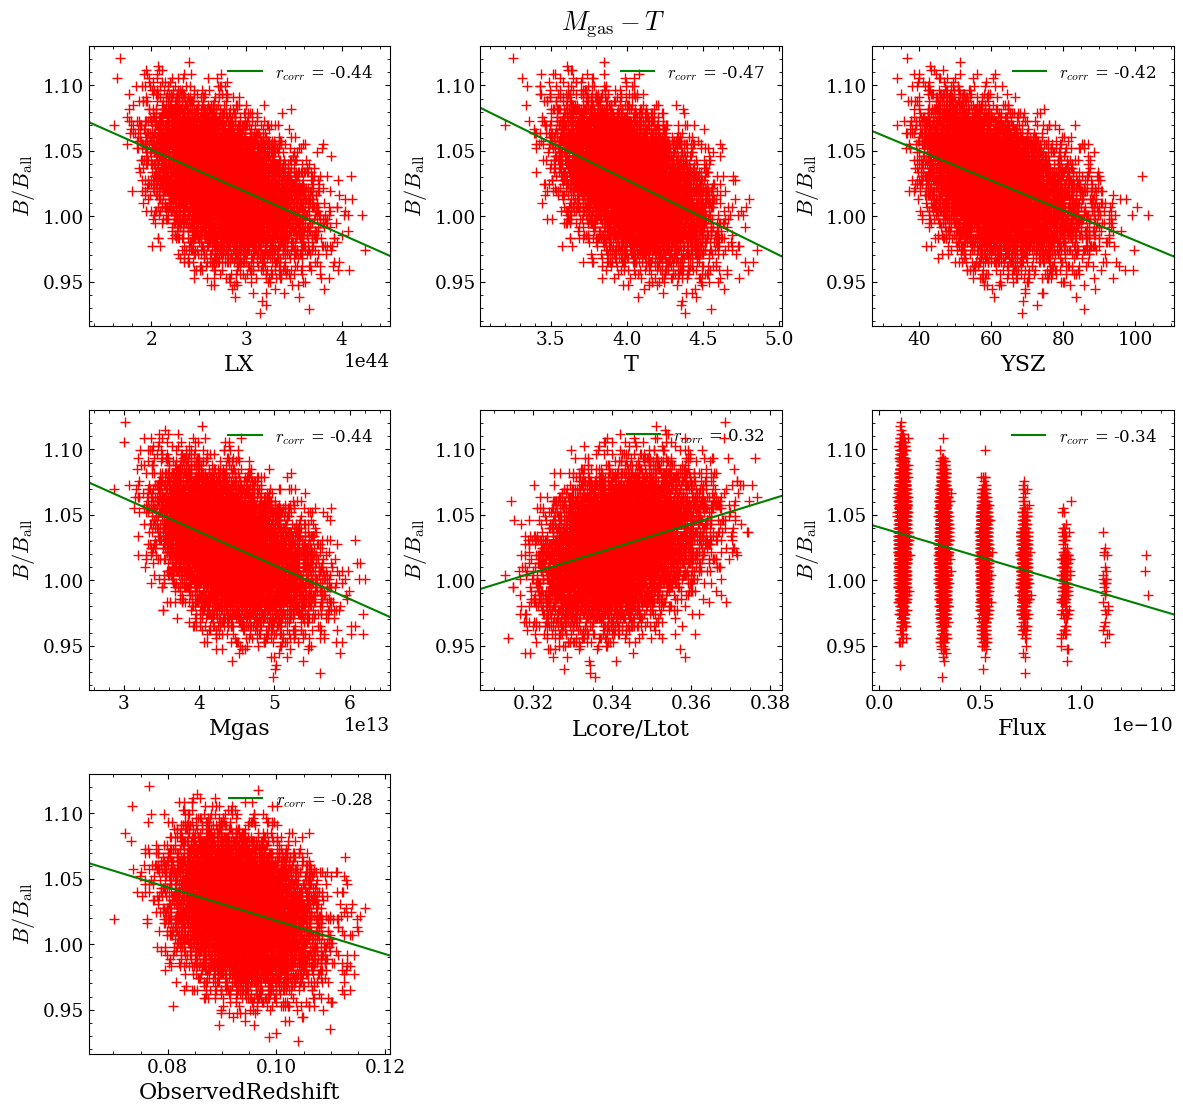

In [15]:
data = pd.read_csv('../data/fits/physical-properties-corr-M-T-60deg.csv')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('$M_\\mathrm{{gas}}-T$', )
fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)

idx = 0
keys = ['LX', 'T', 'YSZ', 'Mgas', 'Lcore/Ltot', 'Flux', 'ObservedRedshift']
for row in ax:
    for subax in row:
        if idx >= len(keys):
            fig.delaxes(subax)
        else:
            Y = data['B']/2.004
            X = data[keys[idx]]

            subax.scatter(X, Y, marker='+', color='r', s=50, linewidths=1)

            xmin = np.min(X)
            xmax = np.max(X)
            xlen = xmax - xmin
            # fit a line
            m, b = np.polyfit(X, Y, 1)
            x = np.linspace(xmin - 0.1*xlen, xmax + 0.1*xlen, 100)
            subax.plot(x, m*x + b, color='g', label='$r_{{corr}}$ = {:.2f}'.format(np.corrcoef(X, Y)[0,1]))
            subax.set_xlim(xmin - 0.1*xlen, xmax + 0.1*xlen)

            subax.legend(loc='upper right')
            subax.set_xlabel(keys[idx])
            subax.set_ylabel('$B/B_\\mathrm{all}$')

        idx += 1

plt.show()

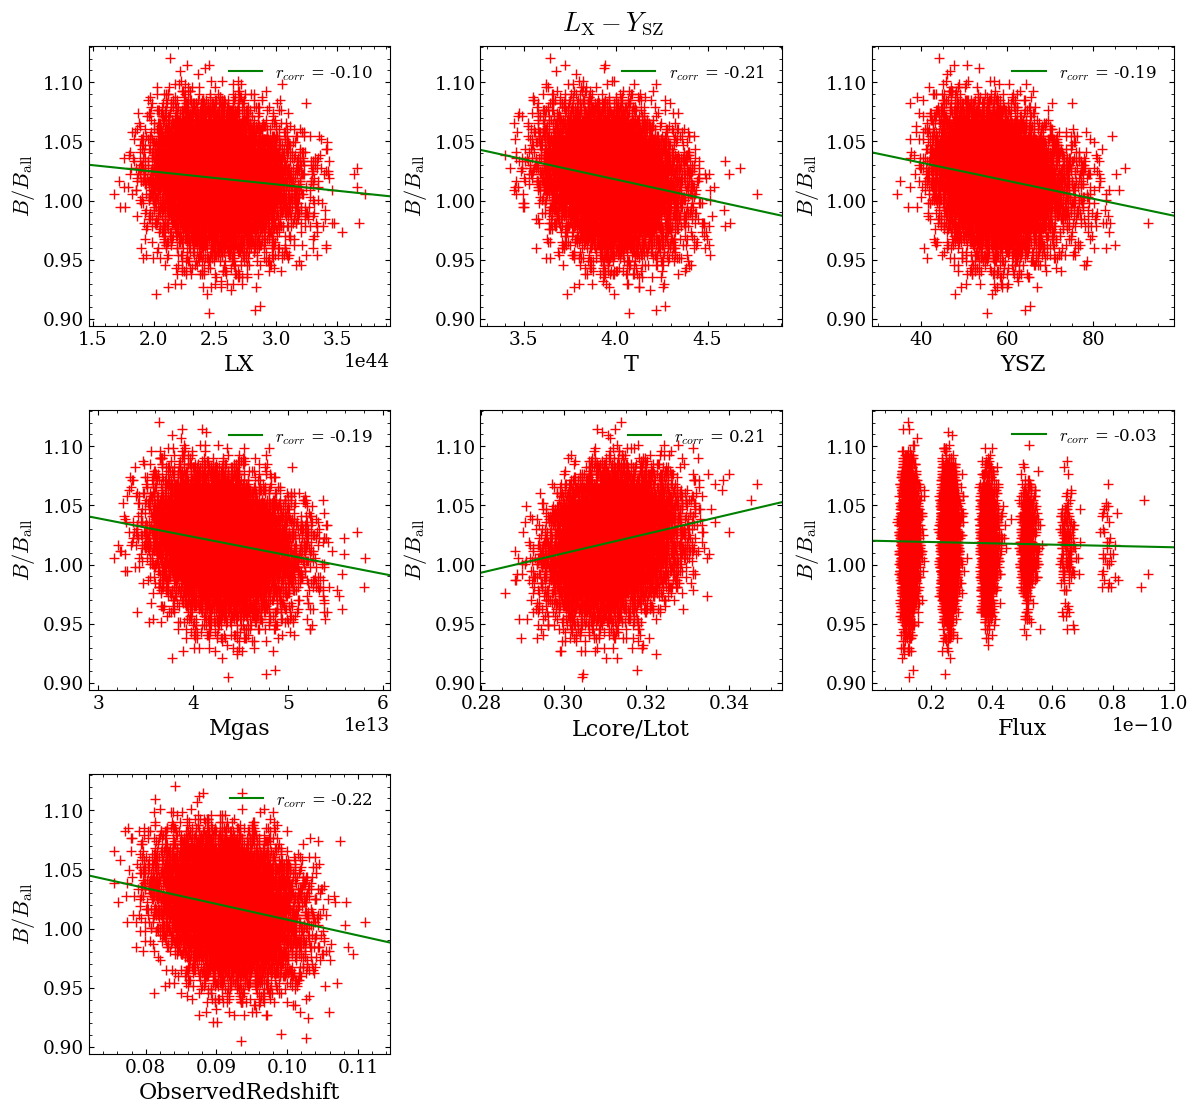

In [19]:
data = pd.read_csv('../data/fits/physical-properties-corr-LX-YSZ-60deg.csv')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('$L_\\mathrm{{X}}-Y_\\mathrm{{SZ}}$', )
fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)

idx = 0
keys = ['LX', 'T', 'YSZ', 'Mgas', 'Lcore/Ltot', 'Flux', 'ObservedRedshift']
for row in ax:
    for subax in row:
        if idx >= len(keys):
            fig.delaxes(subax)
        else:
            Y = data['B']/0.882
            X = data[keys[idx]]

            subax.scatter(X, Y, marker='+', color='r', s=50, linewidths=1)

            xmin = np.min(X)
            xmax = np.max(X)
            xlen = xmax - xmin
            # fit a line
            m, b = np.polyfit(X, Y, 1)
            x = np.linspace(xmin - 0.1*xlen, xmax + 0.1*xlen, 100)
            subax.plot(x, m*x + b, color='g', label='$r_{{corr}}$ = {:.2f}'.format(np.corrcoef(X, Y)[0,1]))
            subax.set_xlim(xmin - 0.1*xlen, xmax + 0.1*xlen)

            subax.legend(loc='upper right')
            subax.set_xlabel(keys[idx])
            subax.set_ylabel('$B/B_\\mathrm{all}$')

        idx += 1

plt.show()

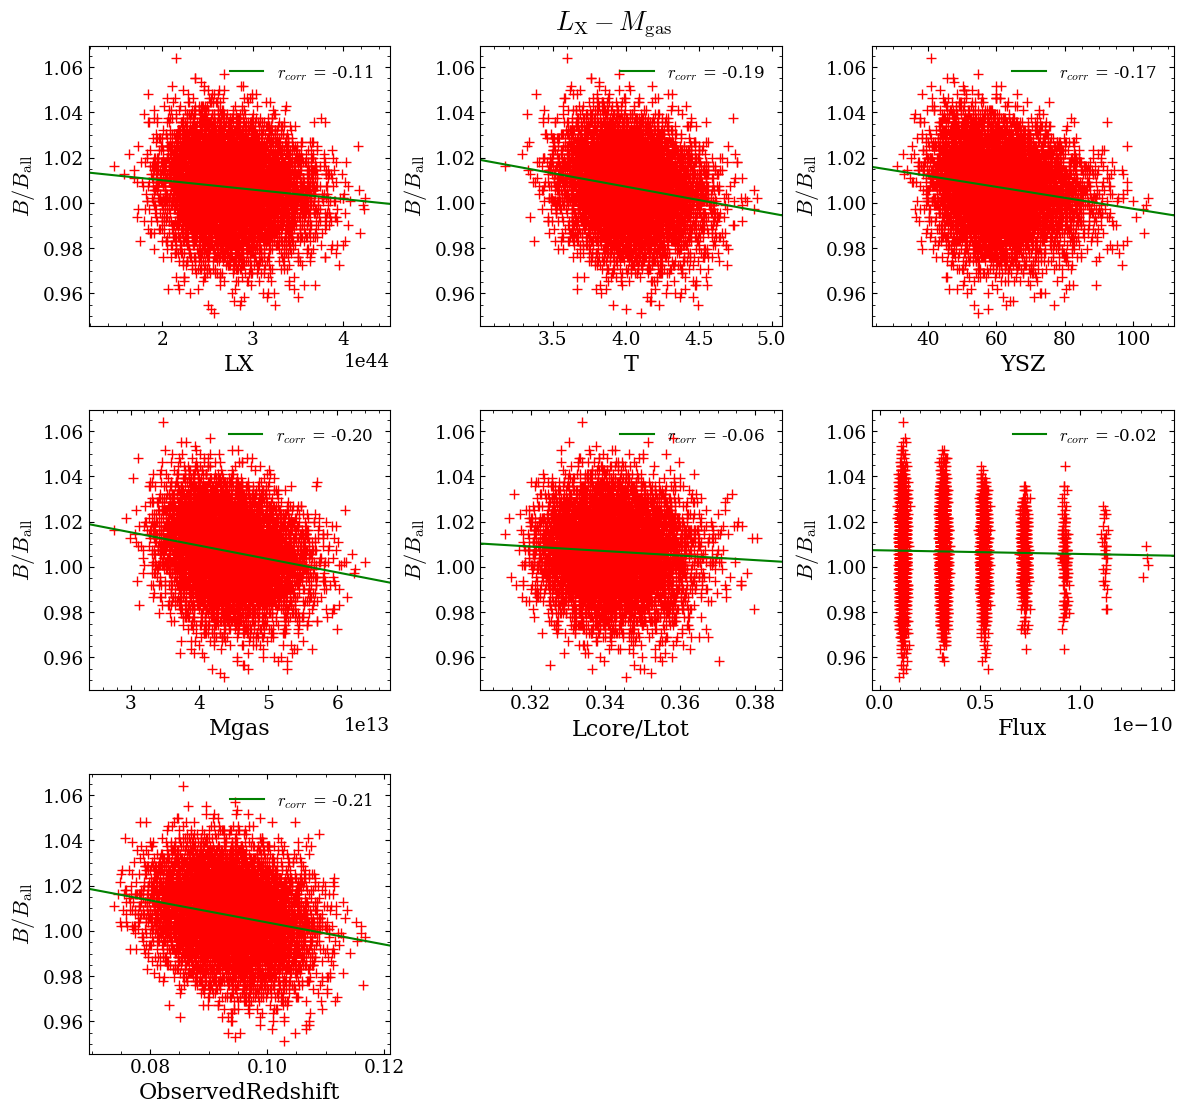

In [20]:
data = pd.read_csv('../data/fits/physical-properties-corr-LX-M-60deg.csv')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('$L_\\mathrm{{X}}-M_\\mathrm{{gas}}$', )
fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)

idx = 0
keys = ['LX', 'T', 'YSZ', 'Mgas', 'Lcore/Ltot', 'Flux', 'ObservedRedshift']
for row in ax:
    for subax in row:
        if idx >= len(keys):
            fig.delaxes(subax)
        else:
            Y = data['B']/1.252
            X = data[keys[idx]]

            subax.scatter(X, Y, marker='+', color='r', s=50, linewidths=1)

            xmin = np.min(X)
            xmax = np.max(X)
            xlen = xmax - xmin
            # fit a line
            m, b = np.polyfit(X, Y, 1)
            x = np.linspace(xmin - 0.1*xlen, xmax + 0.1*xlen, 100)
            subax.plot(x, m*x + b, color='g', label='$r_{{corr}}$ = {:.2f}'.format(np.corrcoef(X, Y)[0,1]))
            subax.set_xlim(xmin - 0.1*xlen, xmax + 0.1*xlen)

            subax.legend(loc='upper right')
            subax.set_xlabel(keys[idx])
            subax.set_ylabel('$B/B_\\mathrm{all}$')

        idx += 1

plt.show()

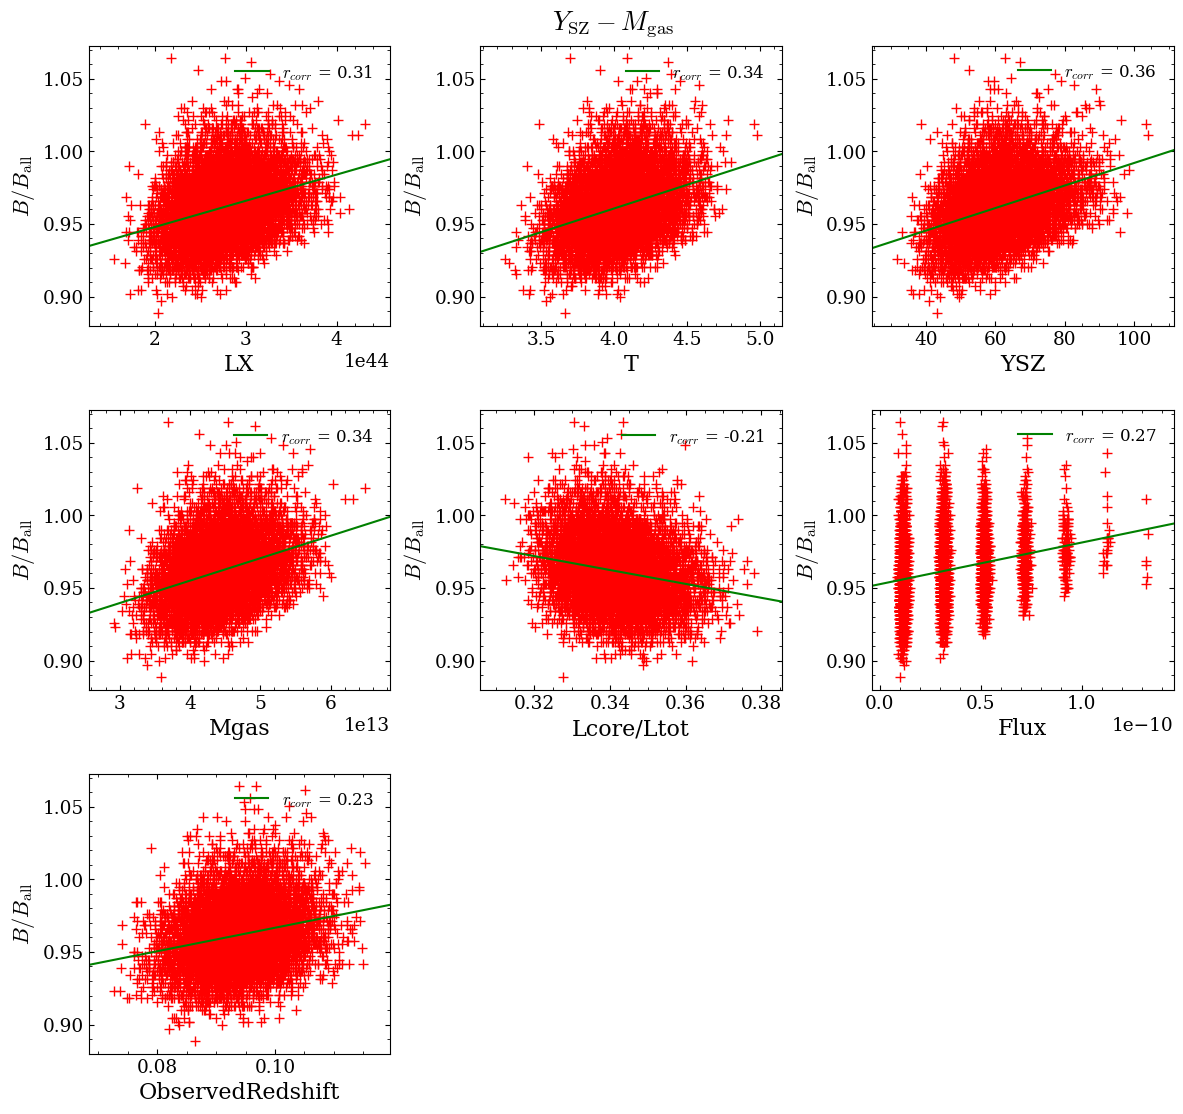

In [21]:
data = pd.read_csv('../data/fits/physical-properties-corr-YSZ-M-60deg.csv')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('$Y_\\mathrm{{SZ}}-M_\\mathrm{{gas}}$', )
fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)

idx = 0
keys = ['LX', 'T', 'YSZ', 'Mgas', 'Lcore/Ltot', 'Flux', 'ObservedRedshift']
for row in ax:
    for subax in row:
        if idx >= len(keys):
            fig.delaxes(subax)
        else:
            Y = data['B']/1.356
            X = data[keys[idx]]

            subax.scatter(X, Y, marker='+', color='r', s=50, linewidths=1)

            xmin = np.min(X)
            xmax = np.max(X)
            xlen = xmax - xmin
            # fit a line
            m, b = np.polyfit(X, Y, 1)
            x = np.linspace(xmin - 0.1*xlen, xmax + 0.1*xlen, 100)
            subax.plot(x, m*x + b, color='g', label='$r_{{corr}}$ = {:.2f}'.format(np.corrcoef(X, Y)[0,1]))
            subax.set_xlim(xmin - 0.1*xlen, xmax + 0.1*xlen)

            subax.legend(loc='upper right')
            subax.set_xlabel(keys[idx])
            subax.set_ylabel('$B/B_\\mathrm{all}$')

        idx += 1

plt.show()